#PLOT FUNCTIONS

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
def plot_variables_for_date(data_frame, timestamp_col, selected_date, variables, log_scale=False):
    # Convert 'TimeStamp' column to datetime format
    data_frame[timestamp_col] = pd.to_datetime(data_frame[timestamp_col])

    # Check if selected date exists in the dataset
    if selected_date not in data_frame[timestamp_col].dt.date.unique():
        print(f"Selected date '{selected_date}' does not exist in the dataset.")
        return

    # Check if selected variables exist in the dataset
    non_existent_vars = [var for var in variables if var not in data_frame.columns]
    if non_existent_vars:
        print(f"The following variables do not exist in the dataset: {', '.join(non_existent_vars)}")
        return

    # Filter data for the selected date
    selected_data = data_frame[data_frame[timestamp_col].dt.date == selected_date]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 6)) #Norah  16,8

    # Plot bar plots for the selected variables
    for variable in variables:
        variable_data = selected_data[variable]
        ax.bar(variable, variable_data)

    # Set plot title, x-axis label, and y-axis label #Norah
    plt.title(f'Bar Plots for Variables on {selected_date}', fontsize=18, fontweight='bold', color='black')#Norah 18
    plt.xlabel('Variable', fontsize=14, color='black')#Norah  14
    plt.ylabel('Value', fontsize=14, color='black')#Norah 14

    # Set log scale if requested
    if log_scale:
        ax.set_yscale('log')
        plt.ylabel('Value (Log Scale)', fontsize=14, color='black')#Norah 14

    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)

    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()
    #plt.savefig(path+ plt.title+'.png')

def get_season(month):
    # Determine the season based on the month
    seasons = {'Winter': [1, 2, 12], 'Spring': [3, 4, 5], 'Summer': [6, 7, 8], 'Autumn': [9, 10, 11]}
    for season, months in seasons.items():
        if month in months:
            return season

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)
    return my_format

def plot_sleep_time_distribution_sleep(data, month=None):
    # Set the light background style
    sns.set_style("whitegrid")
    if month:
        if month not in data['Month'].unique():
            print(f"Month {month} doesn't exist in the dataset.")
            return
        data = data[data['Month'] == month]
    sleep_time_components = data[['DeepSleepTime', 'LightSleepTime', 'SleepDreamTime']].sum()
    labels = sleep_time_components.index
    sizes = sleep_time_components.values
    plt.figure(figsize=(8, 8))
    colors = ['#4C72B0', '#55A868', '#C44E52']  # Custom color palette for the light theme
    # Add shadow and gradient effect to the pie chart
    pie = plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 12})
    plt.setp(pie[0], edgecolor='white', linewidth=1)
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
    if month:
        month_name = pd.to_datetime(str(month), format='%m').strftime('%B')
        season = get_season(month)
        #plt.title(f'Distribution of All Sleep Time across Its Components for {month_name} ({season})', fontsize=18, fontweight='bold', color='black')
    #else:
        #plt.title('Distribution of All Sleep Time across Its Components for the Whole Dataset', fontsize=18, fontweight='bold', color='black')
    # Adjust legend style with a shadow effect
    legend = plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 0.8), title='Sleep Components', fontsize=14, title_fontsize=14)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def plot_sleep_time_four_distribution_sleep(data, month=None):
    # Set the light background style
    sns.set_style("whitegrid")
    if month:
        if month not in data['Month'].unique():
            print(f"Month {month} doesn't exist in the dataset.")
            return
        data = data[data['Month'] == month]
    sleep_time_components = data[[ 'LightSleepTime','DeepSleepTime', 'SleepDreamTime','AwakeSleepTime']].sum()
    labels = sleep_time_components.index
    sizes = sleep_time_components.values
    plt.figure(figsize=(8, 8))
    colors = ['#4C72B0', '#55A868', '#C44E52','#E3CF57']  # Custom color palette for the light theme
    # Add shadow and gradient effect to the pie chart
    pie = plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 12})
    plt.setp(pie[0], edgecolor='white', linewidth=1)
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
    if month:
        month_name = pd.to_datetime(str(month), format='%m').strftime('%B')
        season = get_season(month)
        #plt.title(f'Distribution of All Sleep Time across Its Components for {month_name} ({season})', fontsize=18, fontweight='bold', color='black')
    #else:
        #plt.title('Distribution of All Sleep Time across Its Components for the Whole Dataset', fontsize=18, fontweight='bold', color='black')
    # Adjust legend style with a shadow effect
    legend = plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 0.8), title='Sleep Components', fontsize=14, title_fontsize=14)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def plot_yearly_calendar_heatmap(data, variable):
    sns.set(style='dark')
    # Convert "TimeStamp" column to datetime object
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
    data['Year'] = data['TimeStamp'].dt.year
    data['Month'] = data['TimeStamp'].dt.month
    # Pivot the data to create a matrix with months as columns, years as rows, and values as the specified variable
    pivot_data = data.pivot_table(values=variable, index='Year', columns='Month', aggfunc='mean')
    # Reindex the pivot table columns to ensure correct ordering
    pivot_data = pivot_data.reindex(columns=range(1, 13))
    # Create a heatmap with Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': variable})
    #plt.title(f'Yearly Calendar Heatmap for {variable}', fontsize=18, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Year', fontsize=14)
    # Set custom x-axis and y-axis labels for months and years
    month_labels = calendar.month_abbr[1:]  # Abbreviated month names (Jan, Feb, Mar, ...)
    year_labels = pivot_data.index.astype(str)
    # Adjust x-axis tick positions by adding half a step
    plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=month_labels, rotation=0, ha='center', fontsize=10)
    plt.yticks(ticks=list(range(len(year_labels))), labels=year_labels, fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_time_series_sleep(data, variables=None):
    # If no specific variables are provided, plot all variables
    if variables is None:
        variables = data.columns[1:]  # Exclude the 'TimeStamp' column
    # Convert 'TimeStamp' column to datetime format
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Set a custom color cycle for better visualization of multiple lines
    color_cycle = plt.cm.tab20c.colors
    #color_cycle = plt.cm.get_cmap('Blues')

    # Plot time series for each variable
    for i, variable in enumerate(variables):
        color = color_cycle[i % len(color_cycle)]
        #color = color_cycle(i / len(variables))
        #color = (*color[:3], 0.5)  # Set alpha value to 0.5 for transparency

            # Plot time series for each variable

        ax.plot(data['TimeStamp'], data[variable], label=variable, color=color, linewidth=2)
    # Set plot title, x-axis label, and y-axis label
    #plt.title('Time Series for Sleep Variables', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('TimeStamp', fontsize=14, color='black')
    plt.ylabel('Value', fontsize=14, color='black')
    # Move the legend to the right side of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)
    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Show the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

def plot_time_series_sleep2(data, variables=None):
    # If no specific variables are provided, plot all variables
    if variables is None:
        variables = data.columns[1:]  # Exclude the 'TimeStamp' column

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Set a custom color cycle for better visualization of multiple lines
    #color_cycle = plt.cm.tab20c.colors

    color_cycle = plt.cm.get_cmap('Blues')



    # Filter available dates based on available data
    available_dates = data['TimeStamp']

    # Plot time series for each variable
    for i, variable in enumerate(variables):
        color = color_cycle[i % len(color_cycle)]
        variable_data = data[data['TimeStamp'].isin(available_dates)][variable]
        ax.plot(available_dates, variable_data, label=variable, color=color, linewidth=2)

        # If only one variable is being plotted, calculate and plot the mean
        if len(variables) == 1:
            variable_mean = variable_data.mean()
            ax.axhline(y=variable_mean, color=color, linestyle='--', label=f'{variable} Mean')

    # Set plot title, x-axis label, and y-axis label
    #plt.title('Time Series for Sleep Variables', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('TimeStamp', fontsize=14, color='black')
    plt.ylabel('Value', fontsize=14, color='black')

    # Move the legend to the right side of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)

    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

def plot_box_plots_heart(data_frame, plot_max=True, plot_min=True, plot_avg=True):
    sns.set(style="whitegrid")
    box_plot_data = []
    # Create a dictionary to map column names to their labels
    column_labels = {
        'MaxRate': 'Max Rate',
        'MinRate': 'Min Rate',
        'AverageRestRate': 'Average Rest Rate'
    }
    if plot_max:
        box_plot_data.append(data_frame['MaxRate'])
    if plot_min:
        box_plot_data.append(data_frame['MinRate'])
    if plot_avg:
        box_plot_data.append(data_frame['AverageRestRate'])
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=box_plot_data)
    plt.ylabel('Rate')
    #plt.title('Rate Distribution - Box Plot')
    # Set x-axis tick labels using the column labels dictionary
    plt.xticks(range(len(box_plot_data)), [column_labels[column] for column in data_frame.columns if column in column_labels], rotation=0)
    plt.tight_layout()
    plt.show()

def plot_rate_trends(data_frame, plot_max=True, plot_min=True, plot_avg=True):
    sns.set(style="whitegrid")
    # Sort the DataFrame by timestamp
    data_frame = data_frame.sort_values(by='TimeStamp')
    plt.figure(figsize=(10, 6))
    if plot_max:
        plt.plot(data_frame['TimeStamp'], data_frame['MaxRate'], label='MaxRate', color='green', linewidth=2)
    if plot_min:
        plt.plot(data_frame['TimeStamp'], data_frame['MinRate'], label='MinRate', color='blue', linewidth=2)
    if plot_avg:
        plt.plot(data_frame['TimeStamp'], data_frame['AverageRestRate'], label='AverageRestRate', color='green', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Rate')
    #plt.title('Rate Trends Over Time')
    if plot_max and plot_min and plot_avg:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    else:
        plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    ax = plt.gca()
    ax.set_facecolor('#F5F5F5')
    sns.despine()
    plt.show()

def heart_colored_scatter_plot(data_frame, x_column, y_columns, colors, title, x_label, y_label, legend_labels):
    plt.figure(figsize=(10, 6))
    for y_column, color, legend_label in zip(y_columns, colors, legend_labels):
        plt.scatter(data_frame[x_column], data_frame[y_column], color=color, label=legend_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placing legend on the side
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_time_series_activity(data_frame, plot_total_steps=True, plot_total_calories=True, log_scale=False):
    plt.figure(figsize=(10, 6))
    if plot_total_steps:
        plt.plot(data_frame['TimeStamp'], data_frame['TotalSteps'], label='TotalSteps', marker='o',color='green')
    if plot_total_calories:
        plt.plot(data_frame['TimeStamp'], data_frame['TotalCalories'], label='TotalCalories', marker='o',color='blue')
    plt.xlabel('Time')
    plt.ylabel('Value')
    #plt.title('TotalSteps and TotalCalories Over Time')
    plt.legend()
    plt.xticks(rotation=90)
    if log_scale:
        plt.yscale('log')  # Set y-axis to log scale
    plt.tight_layout()
    plt.show()

def plot_scatter_with_regression(data_frame, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.set_palette("pastel")  # Set a pastel color palette
    # Scatter Plot with Regression Line
    sns.regplot(x=x_column, y=y_column, data=data_frame, scatter_kws={'color': '#000080'}, line_kws={'color': 'salmon'})
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} vs {y_column}')
    plt.tight_layout()
    # Calculate the correlation coefficient
    correlation = data_frame[x_column].corr(data_frame[y_column])
    correlation_text = f'Correlation: {correlation:.2f}'
    # Display correlation coefficient on the plot
    plt.annotate(correlation_text, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='black')
    plt.show()

def plot_box_plots_stress(data_frame, plot_max=True, plot_min=True, plot_avg=True):
    sns.set(style="whitegrid")
    box_plot_data = []
    # Create a dictionary to map column names to their labels
    column_labels = {
        'MaxStress': 'Max Stress',
        'MinStress': 'Min Stress',
        'AverageStress': 'Average Rest Stress'
    }
    if plot_max:
        box_plot_data.append(data_frame['MaxStress'])
    if plot_min:
        box_plot_data.append(data_frame['MinStress'])
    if plot_avg:
        box_plot_data.append(data_frame['AverageStress'])
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=box_plot_data)
    plt.ylabel('Stress')
    plt.title('Stress Distribution - Box Plot')
    # Set x-axis tick labels using the column labels dictionary
    plt.xticks(range(len(box_plot_data)), [column_labels[column] for column in data_frame.columns if column in column_labels], rotation=0)
    plt.tight_layout()
    plt.show()

def plot_rate_trends_Stress(data_frame, plot_max=True, plot_min=True, plot_avg=True):
    sns.set(style="whitegrid")
    # Sort the DataFrame by timestamp
    data_frame = data_frame.sort_values(by='TimeStamp')
    plt.figure(figsize=(10, 6))
    if plot_max:
        plt.plot(data_frame['TimeStamp'], data_frame['MaxStress'], label='MaxStress', color='red', linewidth=2)
    if plot_min:
        plt.plot(data_frame['TimeStamp'], data_frame['MinStress'], label='MinStress', color='blue', linewidth=2)
    if plot_avg:
        plt.plot(data_frame['TimeStamp'], data_frame['AverageStress'], label='AverageStress', color='green', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Stress')
    plt.title('Stress Trends Over Time')
    if plot_max and plot_min and plot_avg:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    else:
        plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    ax = plt.gca()
    ax.set_facecolor('#F5F5F5')
    sns.despine()
    plt.show()

#Mounting Google Drive

In [231]:
############################### Mount Google Drive and Authenticate ###############################
print("Mounting Google Drive and Authenticate ...")
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
print("Done")

path="/content/drive/MyDrive/WearablesData/DB/HuaweiF/Features/"# Fit2

#path="/content/drive/MyDrive/WearablesData/DB/HuaweiB/Features/"# Band


Mounting Google Drive and Authenticate ...
Mounted at /content/drive
Done


#SLEEP

In [232]:
#sleep_data = pd.read_csv("/content/Sleep_data.csv")
sleep_data = pd.read_csv( path +"Sleep_data.csv")

In [233]:
sleep_data
#sleep_data.dtypes

,TimeStamp,FallAsleepTime,WakeUpTime,AllSleepTime,DeepSleepTime,LightSleepTime,SleepDreamTime,AwakeSleepTime,SleepNapTime,AwakeTimes,SleepScore,FATime,WUTime,AllSleepTime_,DeepSleepTime_,LightSleepTime_,SleepDreamTime_,AwakeSleepTime_,SleepNapTime_
0,2022-05-13,2022-05-12 23:53:00,2022-05-13 05:32:00,291,118,111,62,48,0,1,77,23:53:00,05:32:00,04:51:00,01:58:00,01:51:00,01:02:00,00:48:00,00:00:00
1,2022-05-14,2022-05-14 00:54:00,2022-05-14 09:48:00,534,180,230,124,0,0,0,87,00:54:00,09:48:00,08:54:00,03:00:00,03:50:00,02:04:00,00:00:00,00:00:00
2,2022-05-17,2022-05-16 23:22:00,2022-05-17 06:11:00,407,165,148,94,2,0,1,86,23:22:00,06:11:00,06:47:00,02:45:00,02:28:00,01:34:00,00:02:00,00:00:00
3,2022-05-18,2022-05-17 21:44:00,2022-05-18 07:00:00,556,218,216,122,0,0,0,83,21:44:00,07:00:00,09:16:00,03:38:00,03:36:00,02:02:00,00:00:00,00:00:00
4,2022-05-19,2022-05-19 00:05:00,2022-05-19 08:52:00,523,214,205,104,4,0,1,89,00:05:00,08:52:00,08:43:00,03:34:00,03:25:00,01:44:00,00:04:00,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2023-03-27,2023-03-27 02:30:00,2023-03-27 06:13:00,204,100,86,18,19,0,1,70,02:30:00,06:13:00,03:24:00,01:40:00,01:26:00,00:18:00,00:19:00,00:00:00
59,2023-03-28,2023-03-27 23:16:00,2023-03-28 08:51:00,567,161,271,135,8,0,1,84,23:16:00,08:51:00,09:27:00,02:41:00,04:31:00,02:15:00,00:08:00,00:00:00
60,2023-04-02,2023-04-02 01:28:00,2023-04-02 10:16:00,528,189,236,103,0,0,0,87,01:28:00,10:16:00,08:48:00,03:09:00,03:56:00,01:43:00,00:00:00,00:00:00
61,2023-04-03,2023-04-03 03:55:00,2023-04-03 08:55:00,244,85,108,51,56,89,3,66,03:55:00,08:55:00,04:04:00,01:25:00,01:48:00,00:51:00,00:56:00,01:29:00


In [234]:
sleep_data = sleep_data[['TimeStamp', 'AllSleepTime',
       'DeepSleepTime', 'LightSleepTime', 'SleepDreamTime', 'AwakeSleepTime',
       'SleepNapTime', 'AwakeTimes', 'SleepScore']]

<ipython-input-235-de35e86366fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['TimeStamp'] = pd.to_datetime(sleep_data['TimeStamp'])  # Convert "TimeStamp" column to datetime object
<ipython-input-235-de35e86366fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['Month'] = sleep_data['TimeStamp'].dt.month


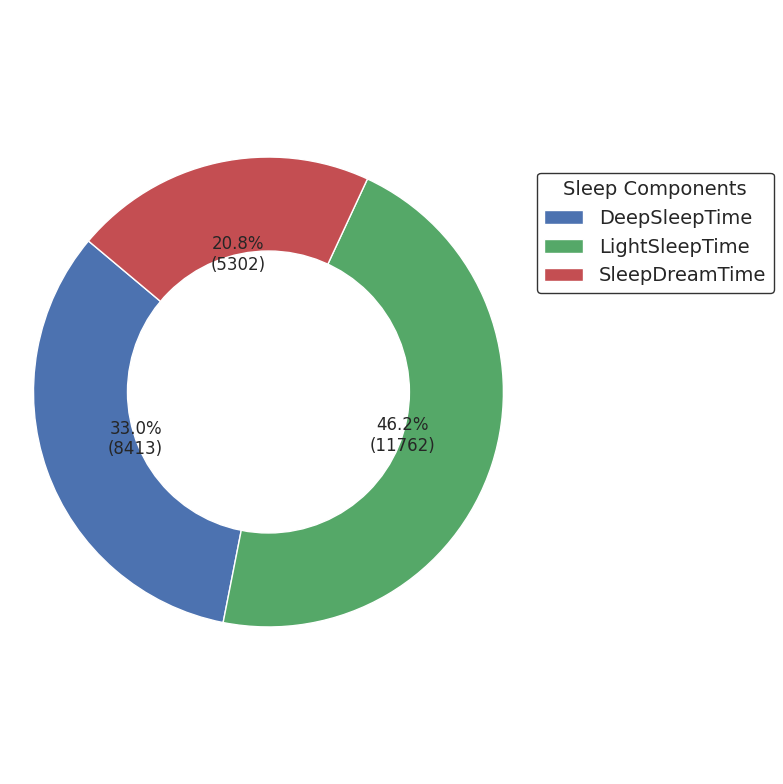

In [235]:
sleep_data['TimeStamp'] = pd.to_datetime(sleep_data['TimeStamp'])  # Convert "TimeStamp" column to datetime object
sleep_data['Month'] = sleep_data['TimeStamp'].dt.month
# Plot for the whole dataset
plot_sleep_time_distribution_sleep(sleep_data)

<ipython-input-236-1c1efcd1562c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['TimeStamp'] = pd.to_datetime(sleep_data['TimeStamp'])  # Convert "TimeStamp" column to datetime object
<ipython-input-236-1c1efcd1562c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['Month'] = sleep_data['TimeStamp'].dt.month


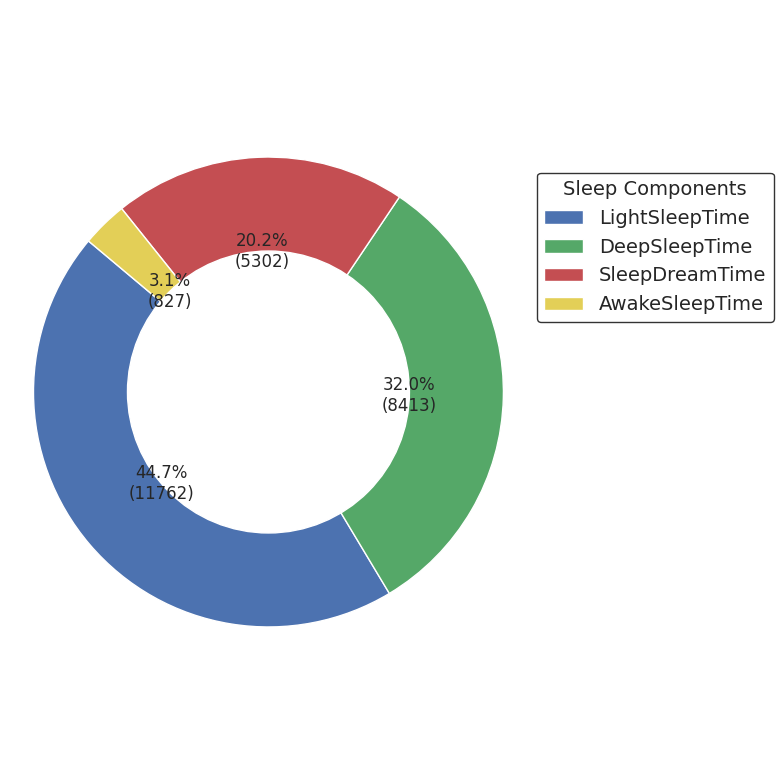

In [236]:
sleep_data['TimeStamp'] = pd.to_datetime(sleep_data['TimeStamp'])  # Convert "TimeStamp" column to datetime object
sleep_data['Month'] = sleep_data['TimeStamp'].dt.month
# Plot for the whole dataset
plot_sleep_time_four_distribution_sleep(sleep_data)

In [237]:
plot_sleep_time_distribution_sleep(sleep_data,7)


Month 7 doesn't exist in the dataset.


<ipython-input-230-a258d779522e>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
<ipython-input-230-a258d779522e>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['TimeStamp'].dt.year
<ipython-input-230-a258d779522e>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

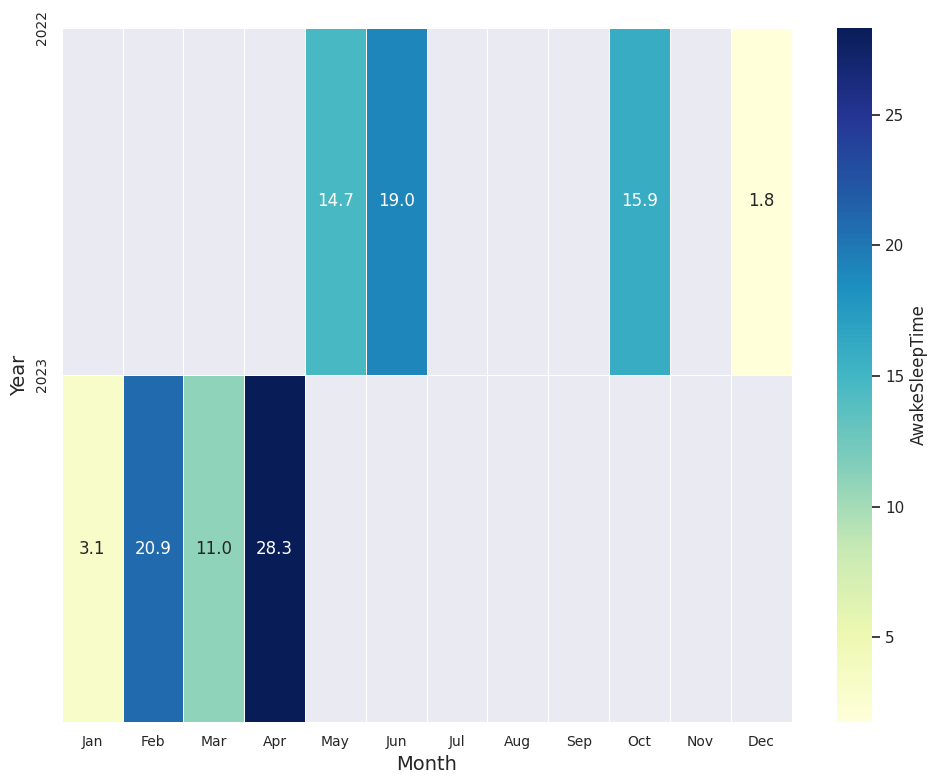

In [238]:
# Call the function with the variable name you want to visualize
#plot_yearly_calendar_heatmap(sleep_data, 'LightSleepTime')
plot_yearly_calendar_heatmap(sleep_data, 'AwakeSleepTime')
#sleep_data = sleep_data[['TimeStamp', 'AllSleepTime', 'DeepSleepTime', 'LightSleepTime', 'SleepDreamTime', 'AwakeSleepTime', 'SleepNapTime', 'AwakeTimes', 'SleepScore']]
#SleepNapTime', 'AwakeTimes

<ipython-input-230-a258d779522e>:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])


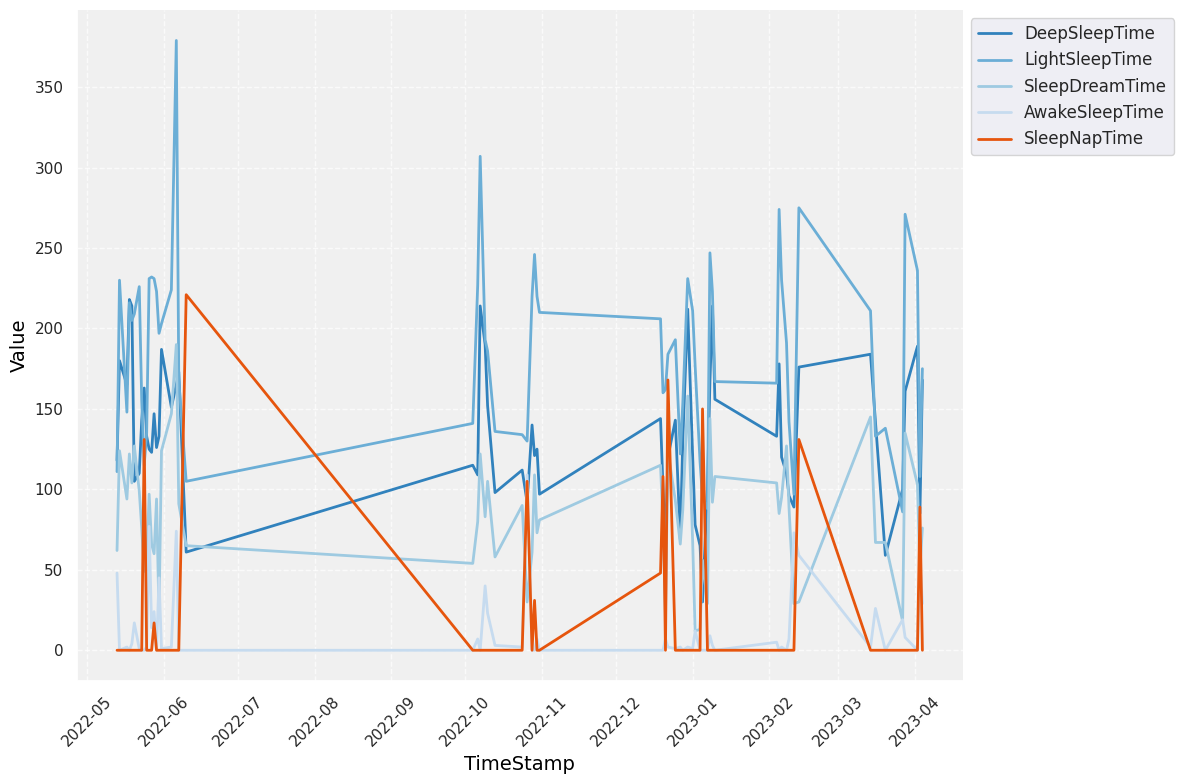

In [239]:
plot_time_series_sleep(sleep_data, ['DeepSleepTime', 'LightSleepTime','SleepDreamTime','AwakeSleepTime','SleepNapTime'])

<ipython-input-230-a258d779522e>:209: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_cycle = plt.cm.get_cmap('Blues')


TypeError: object of type 'LinearSegmentedColormap' has no len()

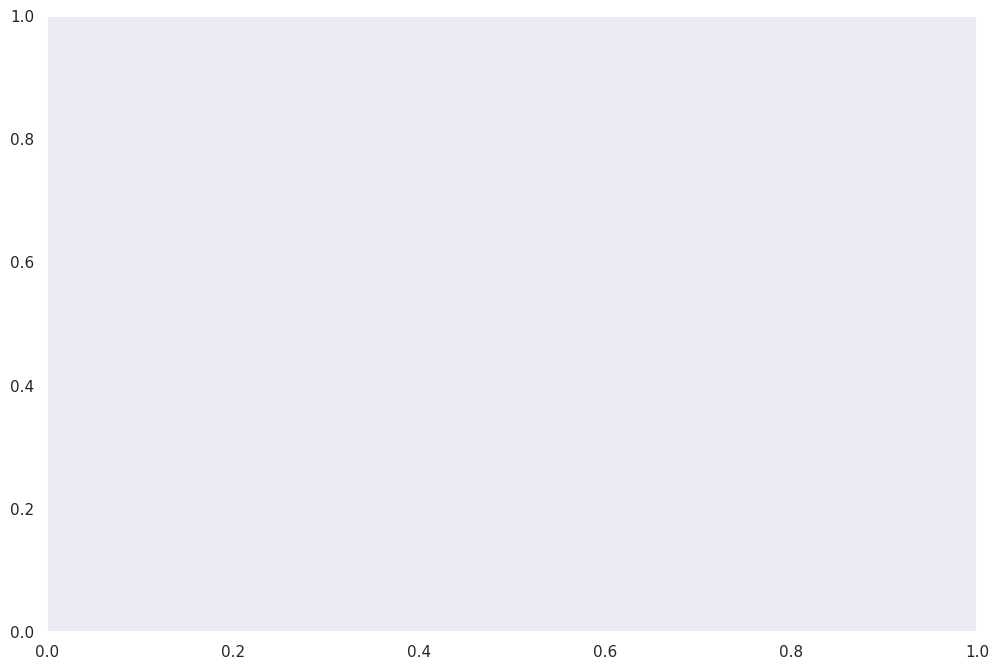

In [240]:
#sleep_data = pd.read_csv("/content/Sleep_data.csv")
plot_time_series_sleep2(sleep_data, [ 'AllSleepTime','SleepNapTime'])


In [ ]:
selected_date = pd.to_datetime('2023-07-17').date()  # Replace with the date you want to plot
variables_to_plot = ['DeepSleepTime', 'LightSleepTime', 'SleepDreamTime','AwakeSleepTime','SleepNapTime'] # Replace with the vars you want to plot
#[['TimeStamp', 'AllSleepTime', 'DeepSleepTime', 'LightSleepTime', 'SleepDreamTime', 'AwakeSleepTime','SleepNapTime', 'AwakeTimes', 'SleepScore']]

plot_variables_for_date(sleep_data, timestamp_col='TimeStamp', selected_date=selected_date, variables=variables_to_plot, log_scale=False)

#HEART

In [156]:
heart_data = pd.read_csv(path+"Heart_data.csv")

#heart_data = pd.read_csv("/content/Heart_data.csv")
heart_data['TimeStamp'] = pd.to_datetime(heart_data['TimeStamp'])

In [157]:
heart_data

,TimeStamp,MaxRate,MinRate,AverageRestRate
0,2023-07-10,124,60,70
1,2023-07-13,138,44,64
2,2023-07-11,150,53,63
3,2023-07-12,159,54,60
4,2023-07-14,141,52,60
5,2023-07-15,133,51,63
6,2023-07-16,131,55,60
7,2023-07-23,0,0,0
8,2023-07-26,0,0,0
9,2023-07-19,128,49,65


In [158]:
print(heart_data.shape)

(17, 4)


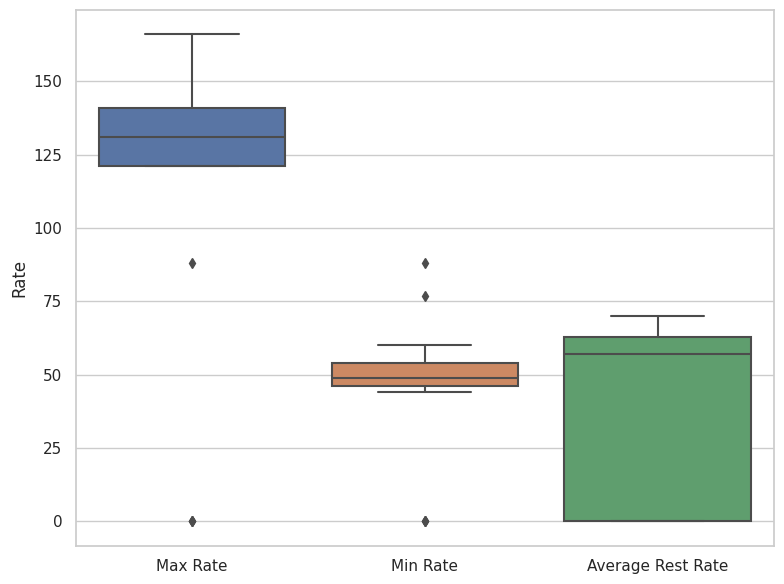

In [159]:
plot_box_plots_heart(heart_data, plot_max=True, plot_min=True, plot_avg=True)

In [160]:
heart_data=heart_data[(heart_data['MaxRate'] != 0) & (heart_data['MinRate'] != 0) & (heart_data['AverageRestRate'] != 0)]

In [161]:
print(heart_data.shape)
heart_data

(12, 4)


,TimeStamp,MaxRate,MinRate,AverageRestRate
0,2023-07-10,124,60,70
1,2023-07-13,138,44,64
2,2023-07-11,150,53,63
3,2023-07-12,159,54,60
4,2023-07-14,141,52,60
5,2023-07-15,133,51,63
6,2023-07-16,131,55,60
9,2023-07-19,128,49,65
10,2023-07-20,131,48,55
11,2023-07-21,121,46,52


In [162]:
max=heart_data.max(axis=0) # will return max value of each column

In [163]:
min=heart_data.min(axis=0) # will return max value of each column

In [164]:
#avg=heart_data.(axis=0) # will return max value of each column
mean = heart_data.mean()

<ipython-input-164-366146540275>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = heart_data.mean()


In [165]:
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)



   ********** Maximum Values ********** 
 TimeStamp          2023-07-21 00:00:00
MaxRate                            166
MinRate                             60
AverageRestRate                     70
dtype: object

   ********** Average Values ********** 
 MaxRate            138.500000
MinRate             50.333333
AverageRestRate     60.500000
dtype: float64

   ********** Minumum Values ********** 
 TimeStamp          2023-07-10 00:00:00
MaxRate                            121
MinRate                             44
AverageRestRate                     52
dtype: object


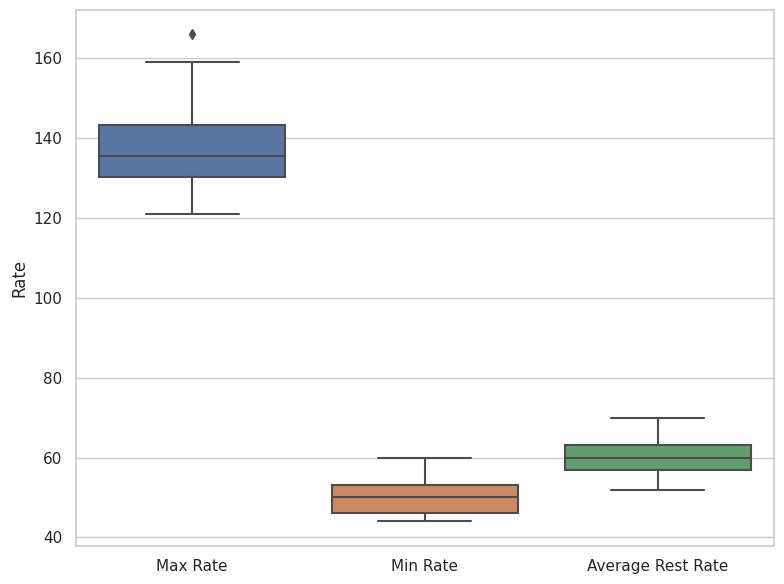

In [166]:
plot_box_plots_heart(heart_data, plot_max=True, plot_min=True, plot_avg=True)

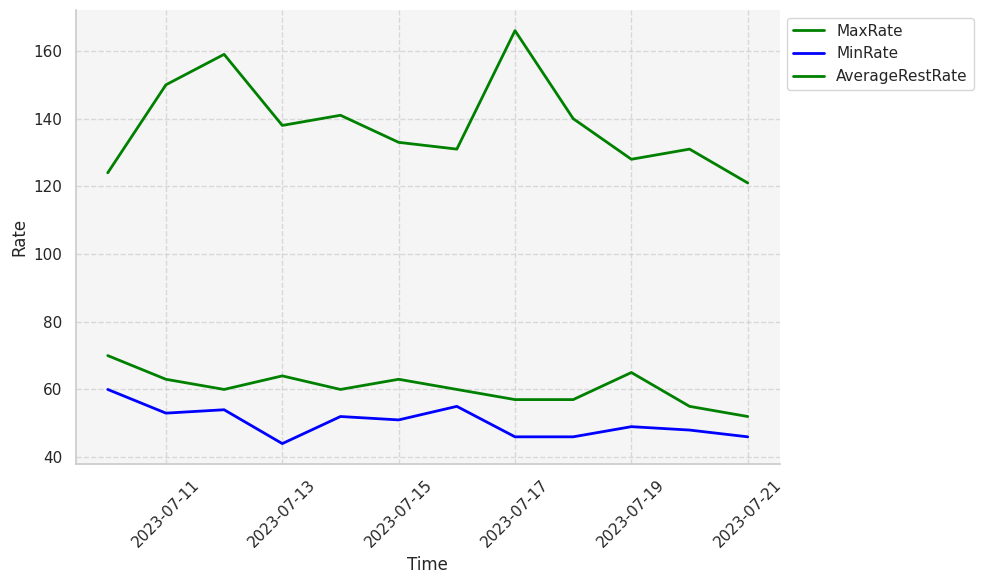

In [167]:
# Choose which variables to plot
plot_rate_trends(heart_data, plot_max=True, plot_min=True, plot_avg=True)

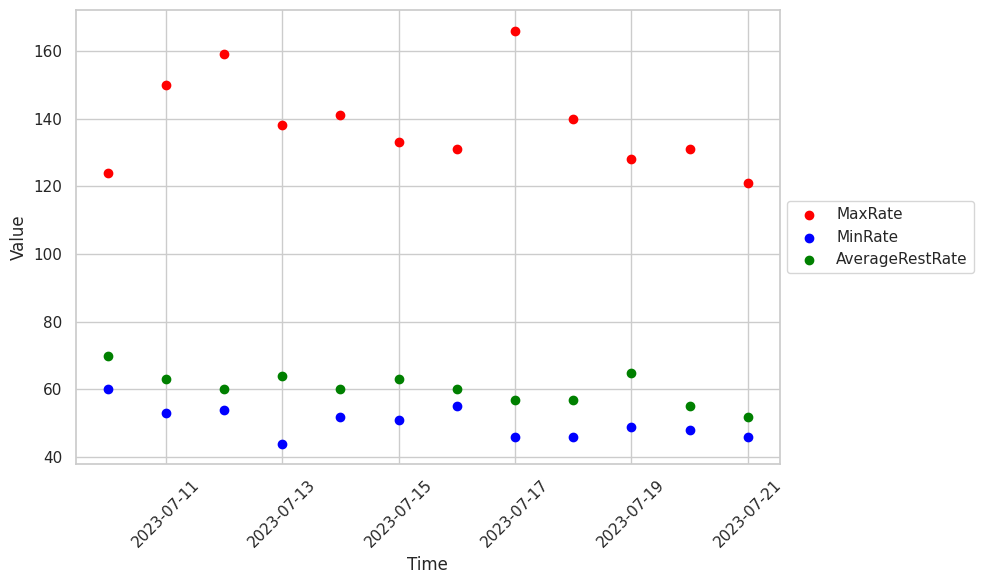

In [168]:
x_column = 'TimeStamp'
y_columns = ['MaxRate', 'MinRate', 'AverageRestRate']
colors = ['red', 'blue', 'green']
legend_labels = ['MaxRate', 'MinRate', 'AverageRestRate']
title = 'Scatter Plot with Different Variables'
x_label = 'Time'
y_label = 'Value'
# Create the scatter plot using the function
heart_colored_scatter_plot(heart_data, x_column, y_columns, colors, title, x_label, y_label, legend_labels)

In [169]:
heart_data=heart_data[(heart_data['AverageRestRate'] > 80)]
heart_data

,TimeStamp,MaxRate,MinRate,AverageRestRate


In [170]:
selected_date = pd.to_datetime('2022-05-17').date()  # Replace with the date you want to plot
variables_to_plot = ['MaxRate', 'MinRate', 'AverageRestRate']
plot_variables_for_date(heart_data, timestamp_col='TimeStamp', selected_date=selected_date, variables=variables_to_plot, log_scale=False)

Selected date '2022-05-17' does not exist in the dataset.


#ACTIVITY

In [171]:
activity_data = pd.read_csv(path +"Activity_data.csv")

In [172]:
activity_data

,TimeStamp,TotalSteps,TotalCalories
0,2023-07-10,2240,80.51
1,2023-07-11,10588,690.55
2,2023-07-12,9435,553.87
3,2023-07-13,4233,427.81
4,2023-07-14,8011,484.32
5,2023-07-15,4016,210.56
6,2023-07-16,5427,321.11
7,2023-07-17,7400,381.78
8,2023-07-18,3819,223.15
9,2023-07-19,2293,101.72


In [173]:
max=activity_data.max(axis=0) # will return max value of each column

In [174]:
min=activity_data.min(axis=0) # will return max value of each column

In [175]:
#avg=heart_data.(axis=0) # will return max value of each column
mean = activity_data.mean()

<ipython-input-175-9384335674d2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = activity_data.mean()


In [176]:
print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")


  


  


   ********** Maximum Values ********** 
 TimeStamp        2023-07-27
TotalSteps            10588
TotalCalories        690.55
dtype: object

   ********** Average Values ********** 
 TotalSteps       4182.933333
TotalCalories     246.602667
dtype: float64

   ********** Minumum Values ********** 
 TimeStamp        2023-07-10
TotalSteps              220
TotalCalories          10.3
dtype: object

  


  



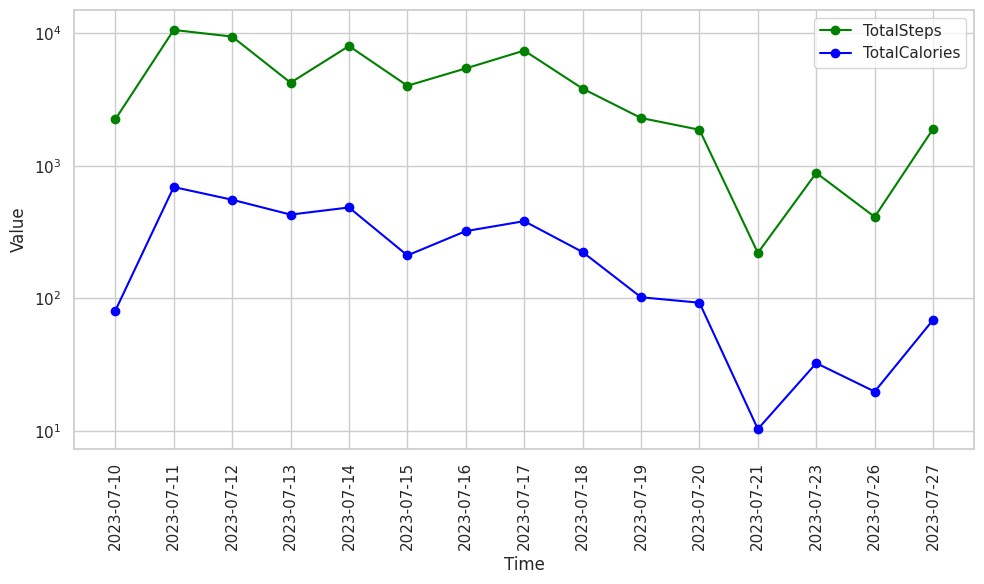

In [177]:
# Choose which variables to plot and whether to use a log scale
plot_time_series_activity(activity_data, plot_total_steps=True, plot_total_calories=True, log_scale=True)
#plt.xticks(rotation=30)

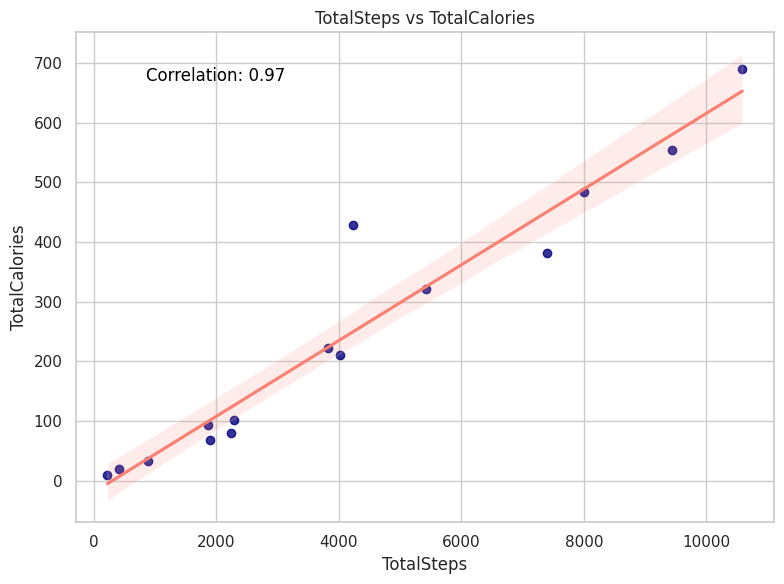

In [178]:
# Choose which columns to plot
plot_scatter_with_regression(activity_data, x_column='TotalSteps', y_column='TotalCalories')

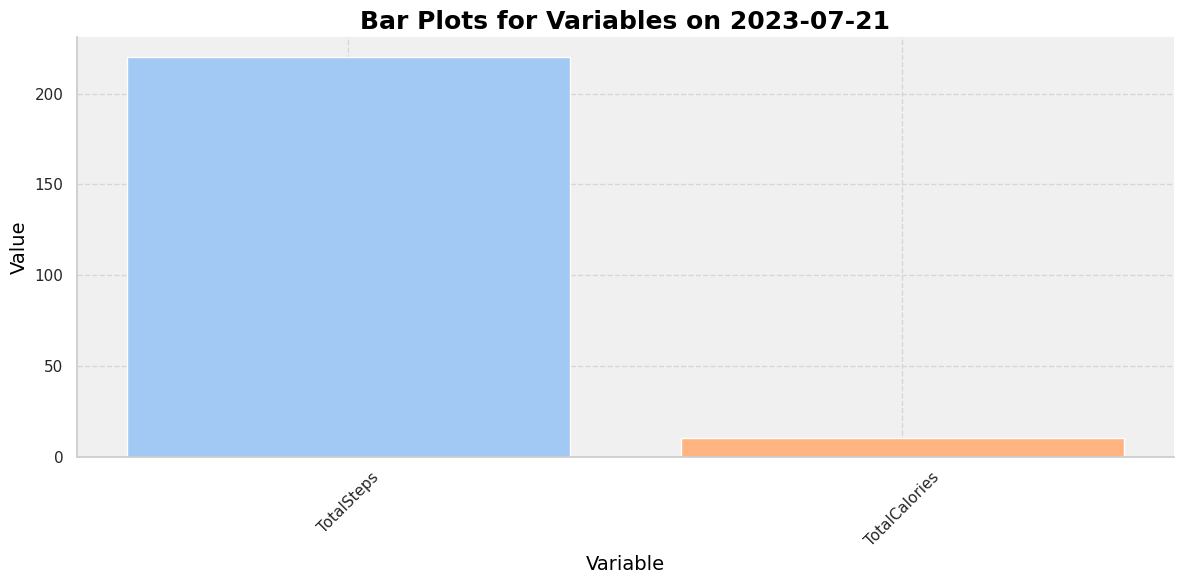

In [179]:
selected_date = pd.to_datetime('2023-07-21').date()  # Replace with the date you want to plot
variables_to_plot = ['TotalSteps', 'TotalCalories']
plot_variables_for_date(activity_data, timestamp_col='TimeStamp', selected_date=selected_date, variables=variables_to_plot, log_scale=False)

#STRESS

In [199]:
stress_data = pd.read_csv(path+"Stress_data.csv")
stress_data['TimeStamp'] = pd.to_datetime(stress_data['TimeStamp'])

In [200]:
stress_data

,TimeStamp,MaxStress,MinStress,AverageStress


In [201]:
#stress_data=stress_data[(stress_data['MaxStress'] == 0) | (stress_data['MinStress'] == 0) | (stress_data['AverageStress'] == 0)]

In [202]:
#stress_data

In [203]:
stress_data=stress_data[(stress_data['MaxStress'] != 0) & (stress_data['MinStress'] != 0) & (stress_data['AverageStress'] != 0)]

In [204]:
stress_data

,TimeStamp,MaxStress,MinStress,AverageStress


In [205]:
max=stress_data.max(axis=0) # will return max value of each column
min=stress_data.min(axis=0) # will return max value of each column
mean = stress_data.mean()

<ipython-input-205-6715b0db21b0>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = stress_data.mean()


In [206]:

print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)



   ********** Maximum Values ********** 
 TimeStamp        NaT
MaxStress        NaN
MinStress        NaN
AverageStress    NaN
dtype: object

   ********** Average Values ********** 
 MaxStress        NaN
MinStress        NaN
AverageStress    NaN
dtype: object

   ********** Minumum Values ********** 
 TimeStamp        NaT
MaxStress        NaN
MinStress        NaN
AverageStress    NaN
dtype: object


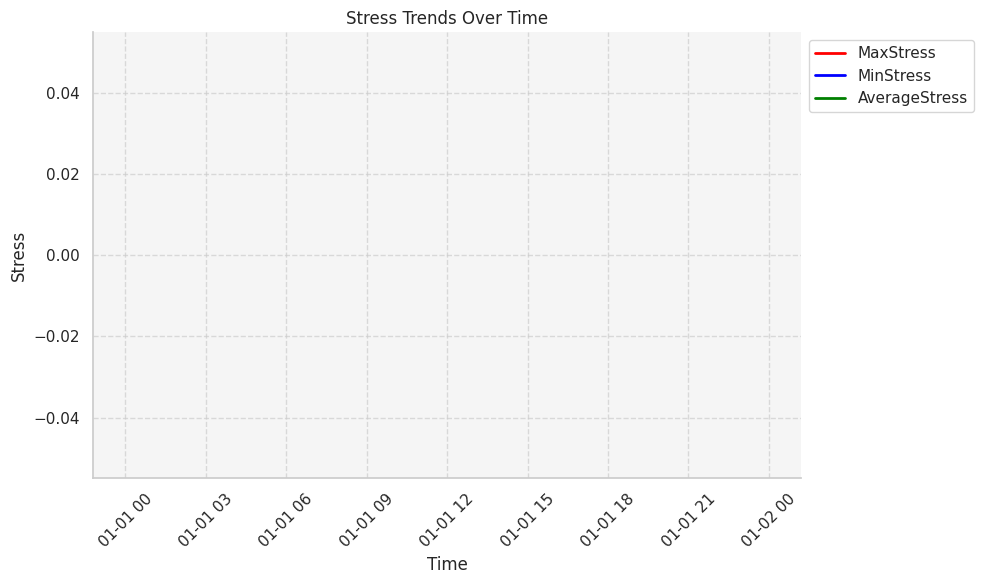

In [207]:
plot_rate_trends_Stress(stress_data, plot_max=True, plot_min=True, plot_avg=True)

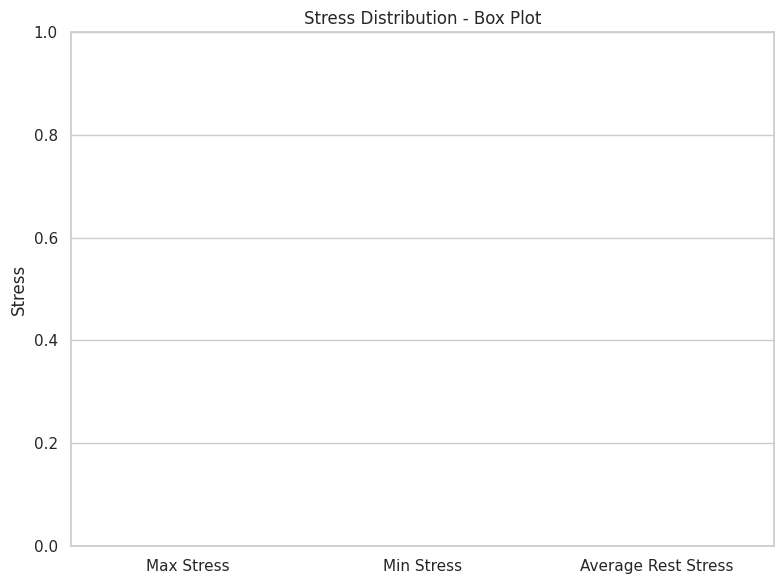

In [208]:
plot_box_plots_stress(stress_data, plot_max=True, plot_min=True, plot_avg=True)

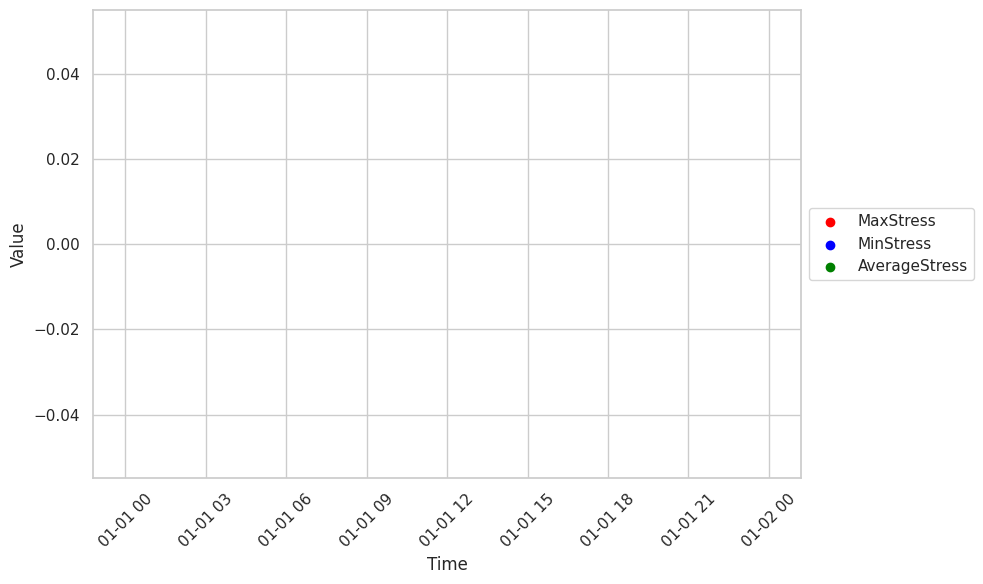

In [209]:
x_column = 'TimeStamp'
y_columns = ['MaxStress', 'MinStress', 'AverageStress']
colors = ['red', 'blue', 'green']
legend_labels = ['MaxStress', 'MinStress', 'AverageStress']
title = 'Scatter Plot with Different Variables'
x_label = 'Time'
y_label = 'Value'
# Create the scatter plot using the function
heart_colored_scatter_plot(stress_data, x_column, y_columns, colors, title, x_label, y_label, legend_labels)

In [210]:
selected_date = pd.to_datetime('2022-05-16').date()  # Replace with the date you want to plot
variables_to_plot = ['MaxStress', 'MinStress', 'AverageStress']
plot_variables_for_date(stress_data, timestamp_col='TimeStamp', selected_date=selected_date, variables=variables_to_plot, log_scale=False)


Selected date '2022-05-16' does not exist in the dataset.


#BloodOxygen

In [211]:
BloodOxygen_data = pd.read_csv(path +"BloodOxygen_data.csv")

In [212]:
BloodOxygen_data

,TimeStamp,MaxBloodOxygen,MinBloodOxygen,AverageBloodOxygen
0,2023-07-10,92,92,0
1,2023-07-13,99,99,0
2,2023-07-11,99,99,0
3,2023-07-14,98,88,0
4,2023-07-15,96,96,0
5,2023-07-19,91,91,0
6,2023-07-20,93,93,0
7,2023-07-17,98,96,0


In [213]:
BloodOxygen_data=BloodOxygen_data[['TimeStamp','MaxBloodOxygen','MinBloodOxygen']]

In [214]:
BloodOxygen_data

,TimeStamp,MaxBloodOxygen,MinBloodOxygen
0,2023-07-10,92,92
1,2023-07-13,99,99
2,2023-07-11,99,99
3,2023-07-14,98,88
4,2023-07-15,96,96
5,2023-07-19,91,91
6,2023-07-20,93,93
7,2023-07-17,98,96


In [215]:
max=BloodOxygen_data.max(axis=0) # will return max value of each column
min=BloodOxygen_data.min(axis=0) # will return max value of each column
mean = BloodOxygen_data.mean()

<ipython-input-215-2f0c2067d9c4>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = BloodOxygen_data.mean()


In [216]:

print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)



   ********** Maximum Values ********** 
 TimeStamp         2023-07-20
MaxBloodOxygen            99
MinBloodOxygen            99
dtype: object

   ********** Average Values ********** 
 MaxBloodOxygen    95.75
MinBloodOxygen    94.25
dtype: float64

   ********** Minumum Values ********** 
 TimeStamp         2023-07-10
MaxBloodOxygen            91
MinBloodOxygen            88
dtype: object


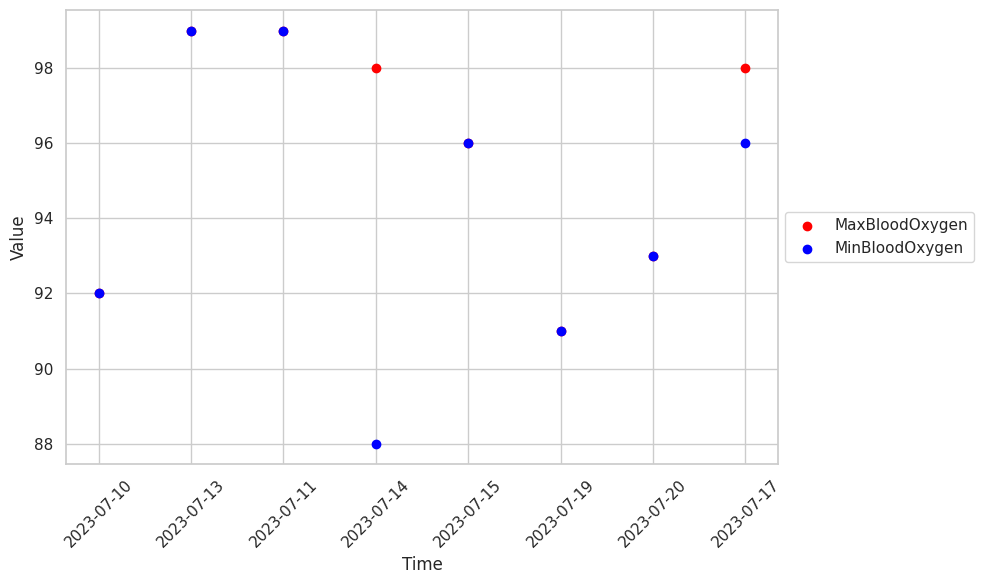

In [218]:
x_column = 'TimeStamp'
y_columns = ['MaxBloodOxygen', 'MinBloodOxygen', 'AverageBloodOxygen']
#y_columns = ['MaxBloodOxygen', 'MinBloodOxygen']

colors = ['red', 'blue', 'green']
#colors = ['red', 'blue']

lgend_labels = ['MaxBloodOxygen', 'MinBloodOxygen', 'AverageBloodOxygen']
#legend_labels = ['MaxBloodOxygen', 'MinBloodOxygen']

title = 'Scatter Plot with Different Variables'
x_label = 'Time'
y_label = 'Value'
# Create the scatter plot using the function
heart_colored_scatter_plot(BloodOxygen_data, x_column, y_columns, colors, title, x_label, y_label, legend_labels)